# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-11-10*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

读取城市站点对应关系

In [2]:
sitelocation = pd.read_excel(obs_dir + 'sitelocation.xlsx')
site_group = sitelocation.groupby('城市')
city_site = {}
for group in site_group.groups:
    city_site[group] = site_group.get_group(group)['监测点编码'].values
city_site

{'东莞': array(['1387A', '1388A', '1389A', '1390A', '1391A', '3319A', '3626A',
        '3627A'], dtype=object),
 '中山': array(['1379A', '1380A', '1381A', '1382A', '3454A'], dtype=object),
 '佛山': array(['1371A', '1372A', '1373A', '1374A', '1375A', '1376A', '1377A',
        '1378A', '3625A'], dtype=object),
 '广州': array(['1345A', '1346A', '1347A', '1348A', '1349A', '1350A', '1351A',
        '1352A', '1353A', '1354A', '1355A', '2846A', '3298A', '3299A',
        '3300A', '3301A', '3302A', '3303A', '3304A', '3443A', '3445A',
        '3446A'], dtype=object),
 '惠州': array(['1392A', '1393A', '1394A', '1395A', '1396A', '3314A', '3452A'],
       dtype=object),
 '江门': array(['1383A', '1384A', '1385A', '1386A', '3311A', '3449A'], dtype=object),
 '深圳': array(['1356A', '1357A', '1358A', '1359A', '1360A', '1361A', '1362A',
        '1363A', '1364A', '1365A', '1366A', '3305A', '3306A', '3307A',
        '3447A', '3623A'], dtype=object),
 '珠海': array(['1367A', '1368A', '1369A', '1370A', '3308A', '3448A'], d

In [3]:
city_list_EN = ['Zhaoqing','Huizhou','Guangzhou','Foshan',
                'Dongguan','Shenzhen','Zhongshan','Jiangmen',
                'Zhuhai']
city_list_CN = ['肇庆', '惠州', '广州', '佛山',
                '东莞', '深圳', '中山', '江门',
                '珠海']
city_dict = {cn:en for cn,en in zip(city_list_CN,city_list_EN)}


In [4]:
var = 'NO2'
lows = [2014, 2015, 2016,]
highs = [2019, 2021, 2022]

dict_low = {}
dict_high = {}

for city in city_list_CN:
    mean_low = []
    mean_high = []
    for year in lows:
        df = pd.read_excel(obsSep + f'site_{var}_{year}.xlsx',index_col=0)
        mean = df[city_site[city]].mean(axis=1,skipna=True).values
        mean_low.append(mean)
    dict_low[city] = np.nanmean(mean_low,axis=0)
    for year in highs:
        df = pd.read_excel(obsSep + f'site_{var}_{year}.xlsx',index_col=0)
        mean = df[city_site[city]].mean(axis=1,skipna=True).values
        mean_high.append(mean)
    dict_high[city] = np.nanmean(mean_high,axis=0)

In [5]:
df_low = pd.DataFrame(
    index=pd.date_range('2023-09-01T00','2023-09-30T23',freq='H'),
    data=dict_low,
)
df_low.rename(columns=city_dict,inplace=True)

df_high = pd.DataFrame(
    index=pd.date_range('2023-09-01T00','2023-09-30T23',freq='H'),
    data=dict_high,
)
df_high.rename(columns=city_dict,inplace=True)

df_low

,Zhaoqing,Huizhou,Guangzhou,Foshan,Dongguan,Shenzhen,Zhongshan,Jiangmen,Zhuhai
2023-09-01 00:00:00,39.500000,21.700000,50.048485,41.125000,32.800000,39.772727,22.250000,19.333333,30.750000
2023-09-01 01:00:00,39.444444,17.233333,41.242424,39.583333,31.533333,29.869697,17.583333,19.250000,26.416667
2023-09-01 02:00:00,39.444444,17.700000,38.912121,38.500000,27.600000,27.527273,19.500000,17.305556,25.166667
2023-09-01 03:00:00,42.555556,16.283333,36.406061,34.583333,25.800000,24.227273,20.416667,18.666667,20.000000
2023-09-01 04:00:00,40.666667,17.583333,29.933333,34.000000,25.666667,22.606061,21.583333,17.583333,20.416667
...,...,...,...,...,...,...,...,...,...
2023-09-30 19:00:00,17.111111,31.600000,51.684848,36.833333,44.511111,54.169697,52.916667,37.166667,39.333333
2023-09-30 20:00:00,17.555556,33.933333,55.693939,34.916667,43.866667,53.139394,49.666667,31.166667,38.166667
2023-09-30 21:00:00,19.222222,33.533333,49.684848,36.750000,47.616667,57.172727,42.666667,27.916667,38.416667
2023-09-30 22:00:00,25.222222,30.066667,43.067340,37.333333,51.333333,55.966667,37.666667,28.333333,37.222222


## 绘制热力图

热力图城市排序按照high的排序

In [6]:
thermal_low = np.array(
 np.array([df_low[city].resample('D').mean() for city in city_list_EN])
)
thermal_high = np.array(
 np.array([df_high[city].resample('D').mean() for city in city_list_EN])
)
thermal_low.shape

(9, 30)

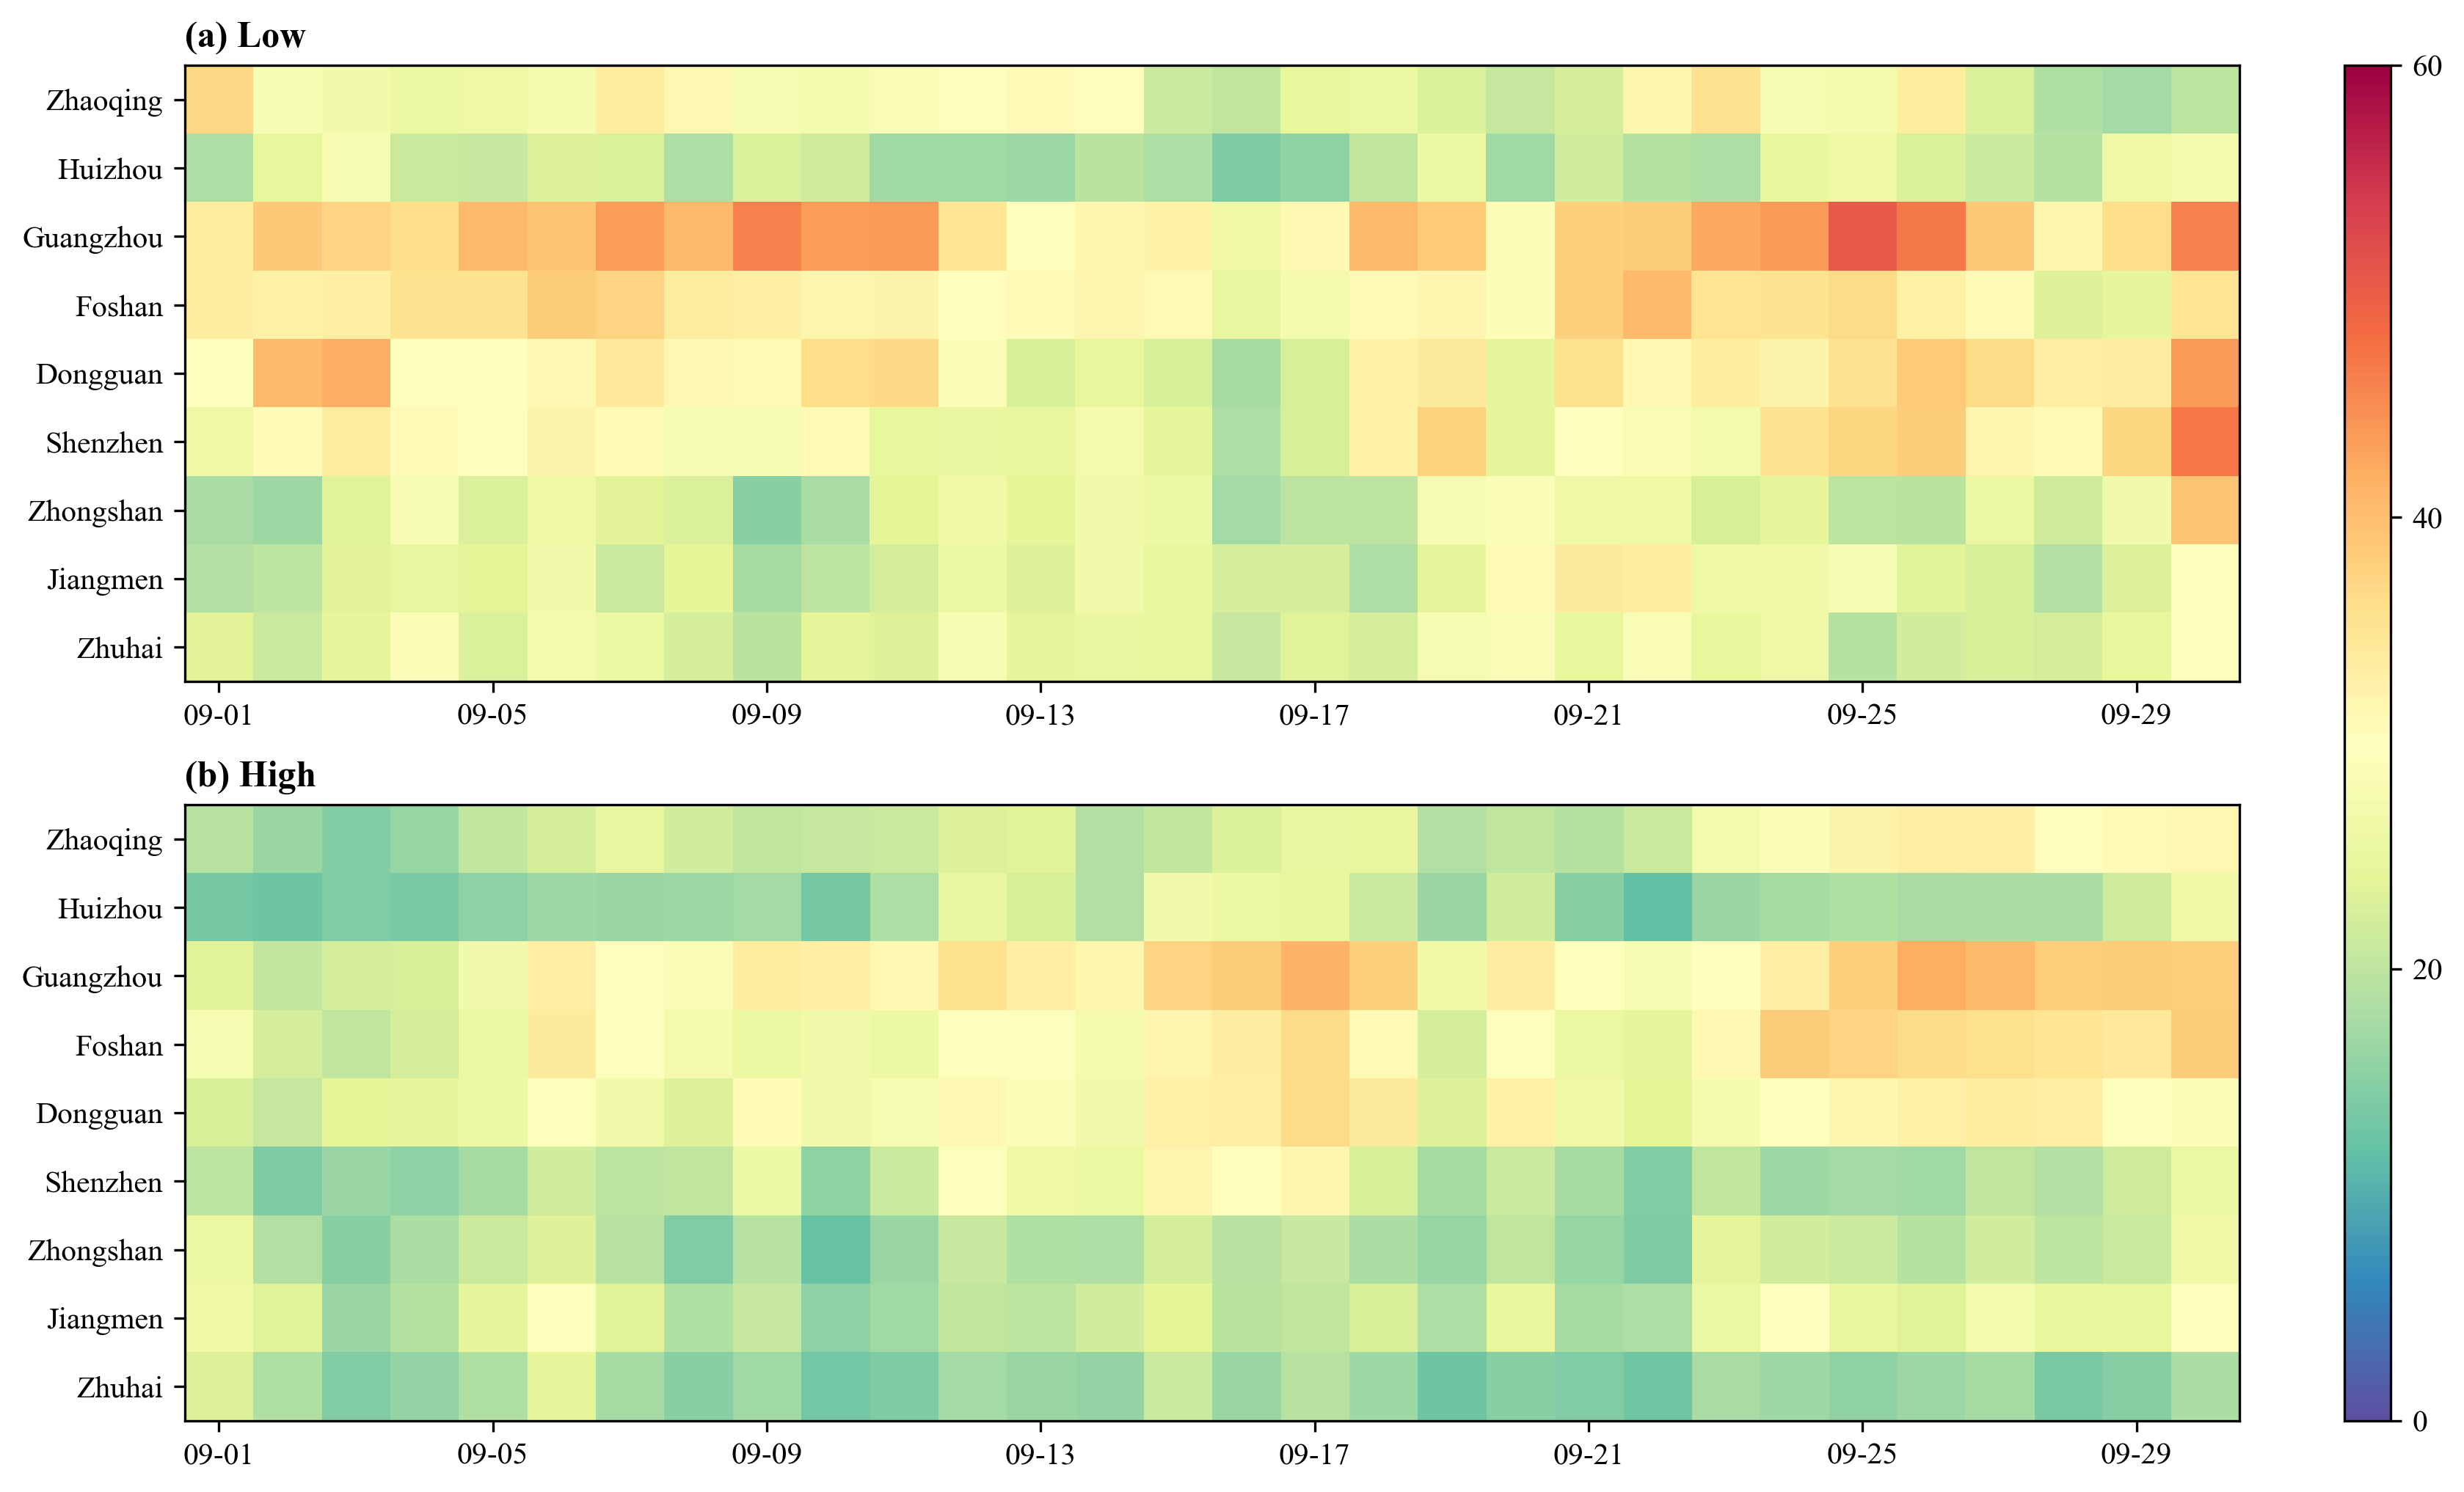

In [9]:
cmin = 0
cmax = 60

fig = plt.figure(figsize=(14, 8),dpi=300)
ax = fig.subplots(2,1)

ci = ax[0].imshow(thermal_low, vmin=cmin,vmax=cmax,cmap='Spectral_r')
ci = ax[1].imshow(thermal_high, vmin=cmin,vmax=cmax,cmap='Spectral_r')

ax[0].set_title('(a) Low', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
ax[1].set_title('(b) High', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})

for ax in ax.flat:
    ax.set_xticks(np.arange(0,np.size(thermal_high,1),4))
    ax.set_xticklabels(pd.date_range('2023-09-01', '2023-09-30', freq='4D').strftime('%m-%d'))
    ax.set_yticks(np.arange(len(city_list_EN)))
    ax.set_yticklabels(city_list_EN)

fig.subplots_adjust(right=0.9,hspace=0.2)
position = fig.add_axes([0.88, 0.11, 0.015, 0.77])
cbar = fig.colorbar(ci, cax=position)
cbar.set_ticks(np.arange(cmin,cmax+.1,20))
# cbar.set_label('')
plt.show()


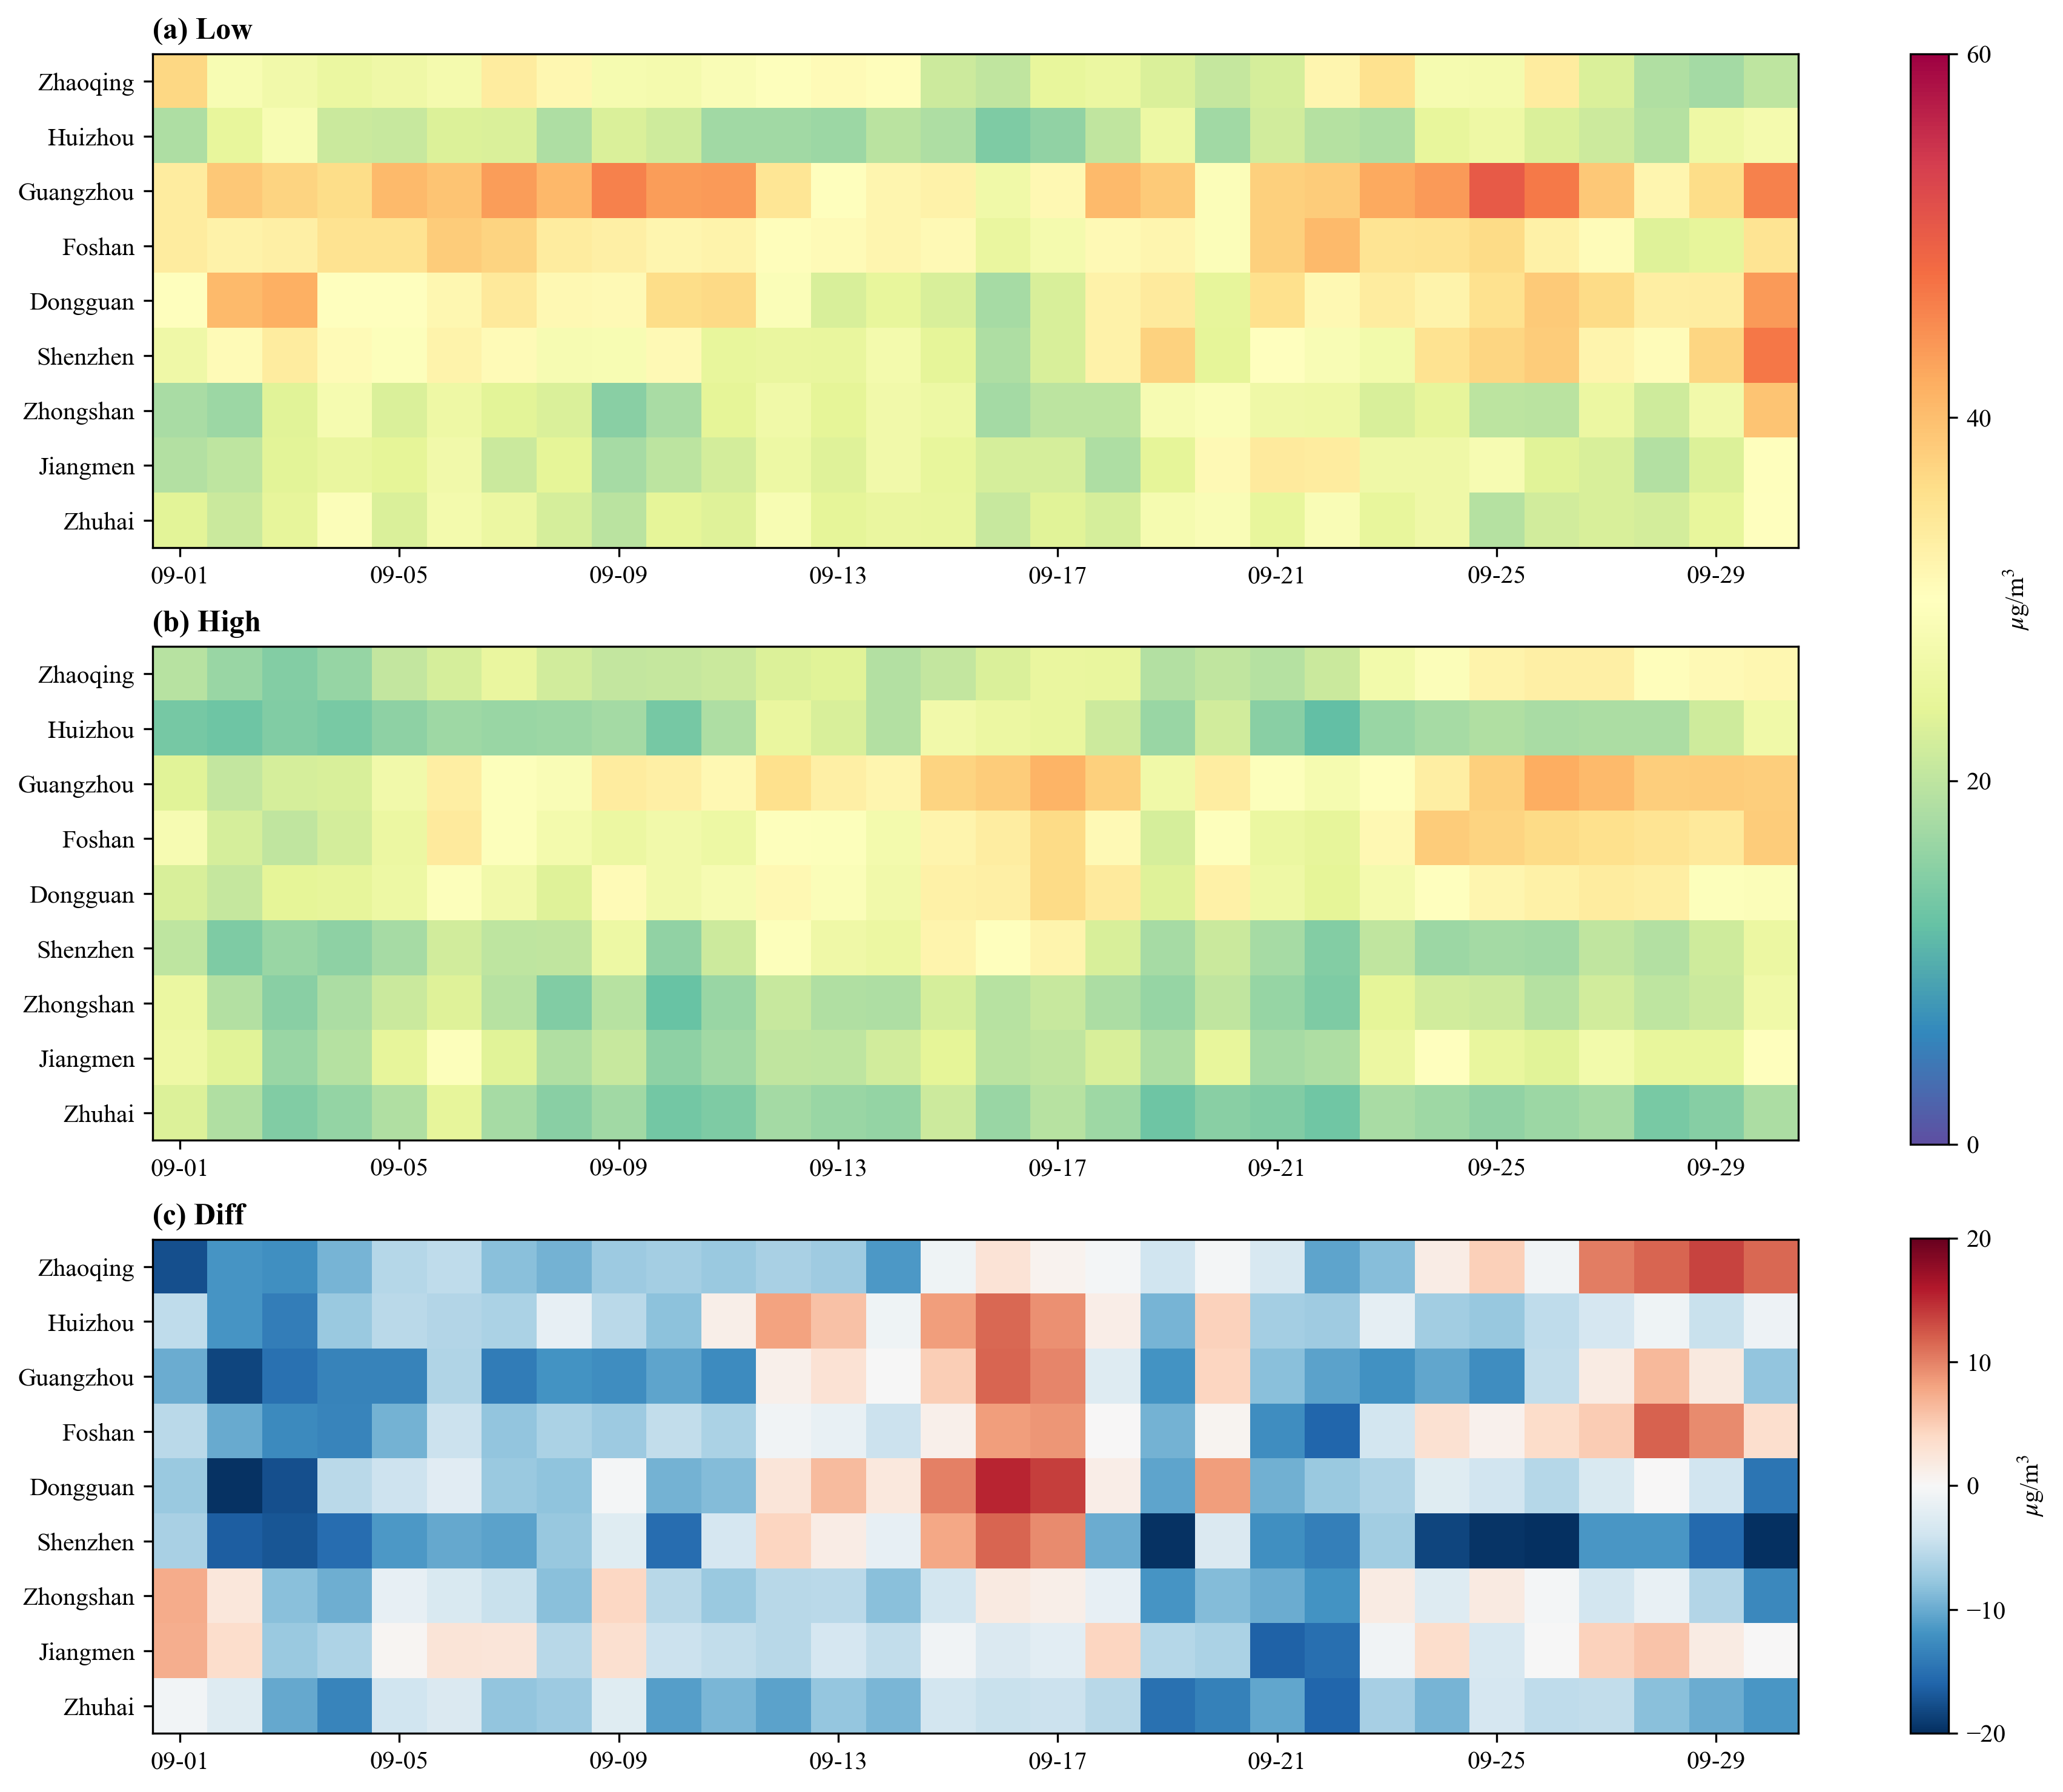

In [10]:
cmin = 0
cmax = 60
dmin = -20
dmax = 20

fig = plt.figure(figsize=(14, 12),dpi=300)
ax = fig.subplots(3,1)

ci = ax[0].imshow(thermal_low, vmin=cmin,vmax=cmax,cmap='Spectral_r')
ci = ax[1].imshow(thermal_high, vmin=cmin,vmax=cmax,cmap='Spectral_r')
cd = ax[2].imshow(thermal_high-thermal_low, vmin=dmin,vmax=dmax,cmap='RdBu_r')

ax[0].set_title('(a) Low', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
ax[1].set_title('(b) High', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
ax[2].set_title('(c) Diff', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})

for i in range(3):
    ax[i].set_xticks(np.arange(0,np.size(thermal_high,1),4))
    ax[i].set_xticklabels(pd.date_range('2023-09-01', '2023-09-30', freq='4D').strftime('%m-%d'))
    ax[i].set_yticks(np.arange(len(city_list_EN)))
    ax[i].set_yticklabels(city_list_EN)

fig.subplots_adjust(right=0.9,hspace=0.2)

position1 = fig.add_axes([0.88, 0.38, 0.015, 0.5])
cbar1 = fig.colorbar(ci, cax=position1)
cbar1.set_ticks(np.arange(cmin,cmax+.1,20))
cbar1.set_label('$\mu$g/m$^3$')

position2 = fig.add_axes([0.88, 0.11, 0.015, 0.227])
cbar2 = fig.colorbar(cd, cax=position2)
cbar2.set_ticks(np.arange(dmin,dmax+.1,10))
cbar2.set_label('$\mu$g/m$^3$')

plt.show()
